## This project focuses on choosing the better product by the customer by apling the sentiment analysis on customer reviews 

In [1]:
import requests

from bs4 import BeautifulSoup

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt

def get_sentiments(text):
    analyzer = SentimentIntensityAnalyzer()
    return analyzer.polarity_scores(text)

## this method get_sentiments will take the general text as input and applies the sentiment analysis on the text and returns the result

In [2]:



def get_reveiws(iteam_url):

    headers = {'User-Agent': 'Mozilla/5.0'}

    page = requests.get(iteam_url, headers=headers)


    soup = BeautifulSoup(page.text, 'html5lib')

    print ("product title")
    span = soup.find('span', {'id': 'productTitle'})

    print (span.get_text().strip())


    price_span = soup.find('span', {'id': 'priceblock_ourprice'})
    print("product price details")
    print (price_span.get_text().strip())


    saving_table = soup.find_all('tr', {'id': 'regularprice_savings'})

    for row in saving_table:
        print (row.get_text().strip())


    reviews_list = soup.find_all('div', {'id': 'cm-cr-dp-review-list'})
    
    


    customer_reviews = []

    cutomer_rating = []

    for review in reviews_list[0]:
        review_span = review.find_all('span')
        cutomer_rating.append(review_span[1].get_text().strip())
        customer_reviews.append(review_span[7].get_text().strip())
    
    return customer_reviews, cutomer_rating, soup

## this method is used to point to the amazon web page and mine the web page by using the request module

### the result of the request module is passed to BeautifulSoup so that web page can be mined now

### mining of web page includes the below steps (these tags are common tags for every amazon page)
- title of the product is been retrved from the span tag with id productTitle and get text method gives the title of the product
- price of the product is been retrived from the table content with table row holding id priceblock_ourprice and get text method gives the price details of the product
- to get the reviews from the page content the get text of getting the div tag with id cm-cr-dp-review-list gives the list of reviews 
- and these reviews are analysied with the get_sentiments method from above
- and finally this method retrns the ratings and list of reviews and BeautifulSoup object

In [3]:

item_page = input("Please enter the amazon product url : ")
customer_reviews, cutomer_rating, soup = get_reveiws(item_page)

related_items = soup.find('div', {'class': 'a-carousel-viewport'})

sugestions = related_items.find('ol')

first_suggestion = sugestions.findAll('li')[0]

first_suggestion_link = first_suggestion.find('div').find('a', {'class': 'a-link-normal'})['href']

if first_suggestion_link.startswith( 'https://www.amazon.com'):
    print ("url is fine")
else:
    print('url is modified')
    first_suggestion_link = "https://www.amazon.com" + first_suggestion_link

Please enter the amazon product url : https://www.amazon.com/dp/B073RJ79XY/ref=sspa_dk_detail_0?psc=1&pd_rd_i=B073RJ79XY&pd_rd_w=hVYoG&pf_rd_p=8a8f3917-7900-4ce8-ad90-adf0d53c0985&pd_rd_wg=vLUlE&pf_rd_r=M5N0SKS6NCXT68SMPS2W&pd_rd_r=180c6f1e-9c2d-11e9-b2ee-5b6c9b26c131
product title
2017 HP Chromebook 11.6 inch Premium Flagship Laptop, Intel Celeron Core N2840 up to 2.58GHz, 4GB RAM, 16GB Flash SSD, 802.11ac WiFi, Bluetooth, Webcam, USB 3.0, Chrome OS (Renewed)
product price details
$139.98
url is fine


### This block of code asks the user to enter the amazon produt url which the suer wants to apply analysis 

### after that the below actions are perfomed
- by using the get_reveiws method from above the list of analysed sentiments and beautiful soup object are obtained 
- from the soup object by using the class called a-carousel-viewport for a div tag a list of similer product details are retrived
- in the above list there will be ordered list such that the first list item is retrived
- in the first list item there will be only one div tag which is retrived
- from the div tag there will be only one anchor tag with class a-link-normal is retrived
- the href of the above anchor tag directs to the product page of first similer product 
- if the product page start with https://www.amazon.com then the url is used normally else it append to the get text of href element

sugestion product title adn details
product title
Microsoft Surface Laptop 2 (Intel Core i7, 8GB RAM, 256 GB) - Black Newest Version (DAJ-00092)
product price details
$1,588.99


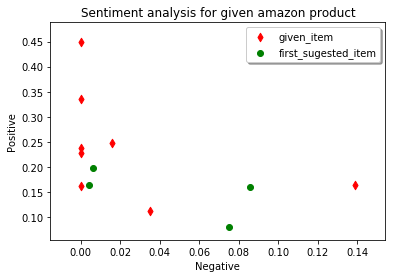

In [4]:
print ("sugestion product title adn details")
sugestion_reviews, sugestion_rating, sugestion_soup = get_reveiws(first_suggestion_link)
    
fig = plt.figure()

ax = fig.add_subplot(111)

sentiments = [get_sentiments(rev) for rev in customer_reviews]

sugestion_sentiments = [get_sentiments(srev) for srev in sugestion_reviews]


sxs = [sent['neg'] for sent in sugestion_sentiments]
#sys = [sent['neu'] for sent in sugestion_sentiments]
szs = [sent['pos'] for sent in sugestion_sentiments]

xs = [sent['neg'] for sent in sentiments]
#ys = [sent['neu'] for sent in sentiments]
zs = [sent['pos'] for sent in sentiments]

plt.scatter(xs,zs,color='r',label='given_item', marker = 'd')
plt.scatter(sxs,szs,color='g',label='first_sugested_item', marker = 'o')

plt.xlabel('Negative')
#ax.set_ylabel('Neutral')
plt.ylabel('Positive')



plt.legend(loc = "upper right",shadow=True)

plt.title('Sentiment analysis for given amazon product')
plt.show()


#### from the above href url again the get_reveiws method is used to retrive the list of sentiment analysis of the cutomer reviews for first similer product 

#### now on the x axis the negitive sentiments are ploted and viceversa 

# Conclusion
### This application applies the sentiment analysis on the customer reviews of given product and first product in the suggestion list , Instead of looking for another product this will automatically retrieves data for similar product which product has more plots towards negative axis that product can be considered as the  low rated one.As i have taken a 2017 HP Chromebook 11.6 inch Premium Flagship Laptop as input  sugestion was HP 15-bs234wm Intel Pentium N5000 Quad Core, the given product has more positive reviwes than sugested product